In [104]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [105]:
customers_loc_url = "https://raw.githubusercontent.com/drolsonmi/math3480/main/datasets/kNN_neighborhoods.csv"
customers_stores_url = "https://raw.githubusercontent.com/drolsonmi/math3480/main/datasets/kNN_shops.csv"
potential_cust_url = "https://raw.githubusercontent.com/drolsonmi/math3480/main/datasets/kNN_newcustomers.csv"

loc = pd.read_csv(customers_loc_url, skiprows=0, names=["x_coor", "y_coor"])
stores = pd.read_csv(customers_stores_url, skiprows=0, names=["store"])
potential_cust = pd.read_csv(potential_cust_url, names=["x_coor", "y_coor"])

customers = loc
customers["store"] = stores
customers["store"] = np.floor(customers["store"])


In [106]:
potential_cust.head()

,x_coor,y_coor
0,-5.0,-5.0
1,-10.0,-5.0
2,-4.0,2.0
3,5.0,3.0
4,2.0,0.0


In [107]:
print(len(customers))

200


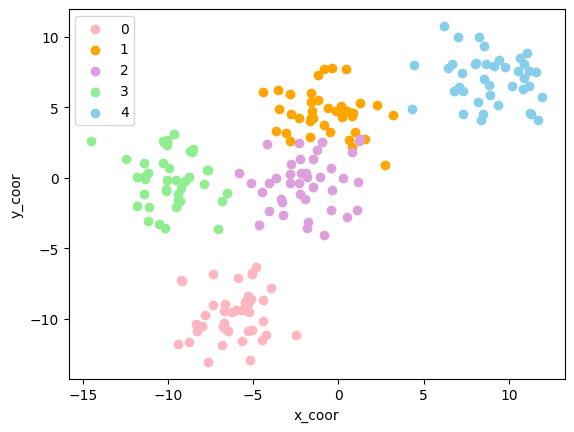

In [108]:
# create scatter plot of current customers

for grp,color in zip([0, 1, 2, 3, 4], ['lightpink', 'orange', 'plum', 'lightgreen', 'skyblue']):
    X_grp = customers[customers['store'] == grp]
    plt.scatter(X_grp['x_coor'], X_grp['y_coor'], c=color, label=grp)
plt.xlabel("x_coor")
plt.ylabel("y_coor")
plt.legend()


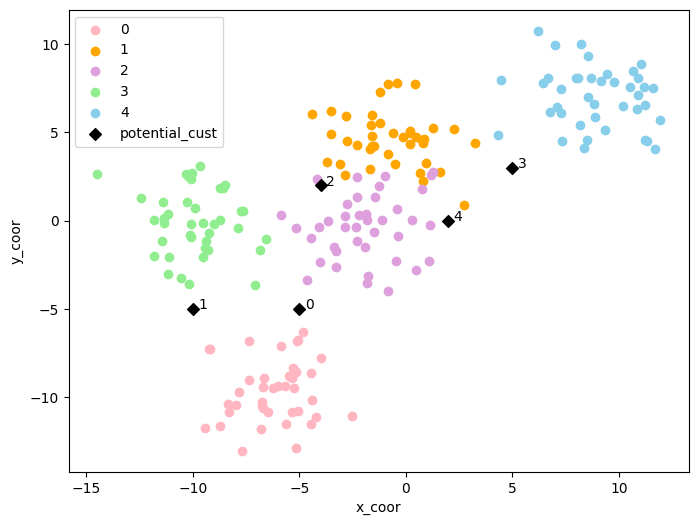

In [109]:
plt.figure(figsize=(8,6))

for grp,color in zip([0, 1, 2, 3, 4], ['lightpink', 'orange', 'plum', 'lightgreen', 'skyblue']):
    X_grp = customers[customers['store'] == grp]
    plt.scatter(X_grp['x_coor'], X_grp['y_coor'], c=color, label=grp)
    

plt.scatter(potential_cust["x_coor"], y=potential_cust["y_coor"], c="black", marker="D", label="potential_cust")

for i, (x, y) in enumerate(zip(potential_cust["x_coor"], potential_cust["y_coor"])):
    plt.text(x + 0.25, y, str(i))

plt.xlabel("x_coor")
plt.ylabel("y_coor")
plt.legend()

In [110]:
# recommend
from sklearn.neighbors import KNeighborsClassifier


k = 13
kNN = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')

X_train = customers[["x_coor", "y_coor"]]
y_train = customers["store"]

kNN.fit(X_train, y_train)

y_test = kNN.predict(potential_cust)
for i in range(5):
    print(f"Customer {i} is predicted to be at store {y_test[i]} ")

Customer 0 is predicted to be at store 0.0 
Customer 1 is predicted to be at store 3.0 
Customer 2 is predicted to be at store 2.0 
Customer 3 is predicted to be at store 4.0 
Customer 4 is predicted to be at store 2.0 
